# 💻  Прогнозирование цен на ноутбуки  💵

## Содержание

В данном проекте используется Laptop Prices Dataset - набор данных, содержащий коллекцию характеристик различных ноутбуков (бренд, тип процессора, объём оперативной памяти, ёмкость накопителя и др., а также цены на эти ноутбуки) 



## Исходные данные

Набор данных содержит как категориальные, так и числовые данные.

Для указания цены на ноутбуки используется валюта в индийских рупиях (INR, ₹)

## Цель

 - Выполнить регрессионный анализ данных для предсказания цен на ноутбуки на основе различных признаков.
 - Построение нескольких моделей для их обучения, также выявление лучшей из них.

## Стадии решения задачи

- подключение необходимых модулей/библиотек
- загрузка данных
- первичный анализ данных
- предобработка данных
- выбор модели, ее обучение
- выявление лучшей модели с помощью метрик

# 1. Подключение модулей

Для решения поставленных задач воспользуемся библиотеками numpy, pandas, seaborn, matplotlib и scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# инструмент для поиска лучших гиперпараметров
from sklearn.model_selection import GridSearchCV

#импортируем модели для их обучения
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# 2. Загрузка данных

In [2]:
df = pd.read_csv('laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


## Описание данных
Признаки:

- brand - название бренда ноутбука
- processor_brand - название бренда процессора
- processor_name - название модели процессора
- processor_gnrtn - поколение процессора
- ram_gb - размер оперативной памяти
- ram_type - тип оперативной памяти
- ssd - размер SSD диска
- hdd - размер HDD диска
- os - вид ОС
- os_bit - биты ОС
- graphic_card_gb - размер видео-памяти
- weight - вес ноутбука
- warranty - наличие гарантии
- Touchscreen - наличие сенсорного экрана
- msoffice - наличие пакета продуктов MSOffice
- rating - оценка
- Number of Ratings - кол-во оценок 
- Number of Reviews - кол-во отзывов

Целевой признак:
- Price - цена на ноутбук

  Было принято решение не конвертировать данные в российскую валюту, так как курс индийского рупия(₹) к рублю(₽) равен: 
1 рупия = 1.2782 руб.

# 2.1 Первичный анализ

In [3]:
# Размерность датасета
df.shape

(823, 19)

Датасет имеет 823 строки и 19 столбцов.

In [4]:
#Вывод случайных 5 значений.
df.sample(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
289,Lenovo,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,3 years,Yes,Yes,68990,4 stars,44,8
76,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,43900,3 stars,0,0
17,Lenovo,Intel,Celeron Dual,Not Available,4 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,31999,4 stars,286,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

После ознакомления с информацией о датасете делаем вывод, что пропущенных значений не наблюдается.

Типы данных признаков датасета:
- object (15)
- int64 (3)

In [6]:
# Убедимся в отсутствии пропущенных значений 
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [7]:
df.describe(include='object')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
count,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823
unique,8,3,11,8,4,6,7,4,3,2,5,3,4,2,2,5
top,ASUS,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,4 stars
freq,249,610,290,334,418,709,398,621,779,714,577,520,509,726,542,444


Делаем следующие выводы из описания категориальных данных:
- Уникальных брендов 8, самый часто встречающийся - ASUS.
- Брендов процессора всего 3, самый частый из них - Intel
- Самой частой моделью процессора является Core i5

В основном: 
- Гарантия составляет 1 год
- Без сенсорного экрана
- Ноутбук является повседневным/офисным
- Рейтинг 4 звезды.


In [8]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


Выводы из описания числовых данных:

- Самый дорогой ноутбук стоит 441990 р.
- Самый дешевый ноутбук стоит 16990 р.
- Есть резкий скачок цен от 75% до max по всем 3 признакам.

В среднем ноутбуки стоят около 76000

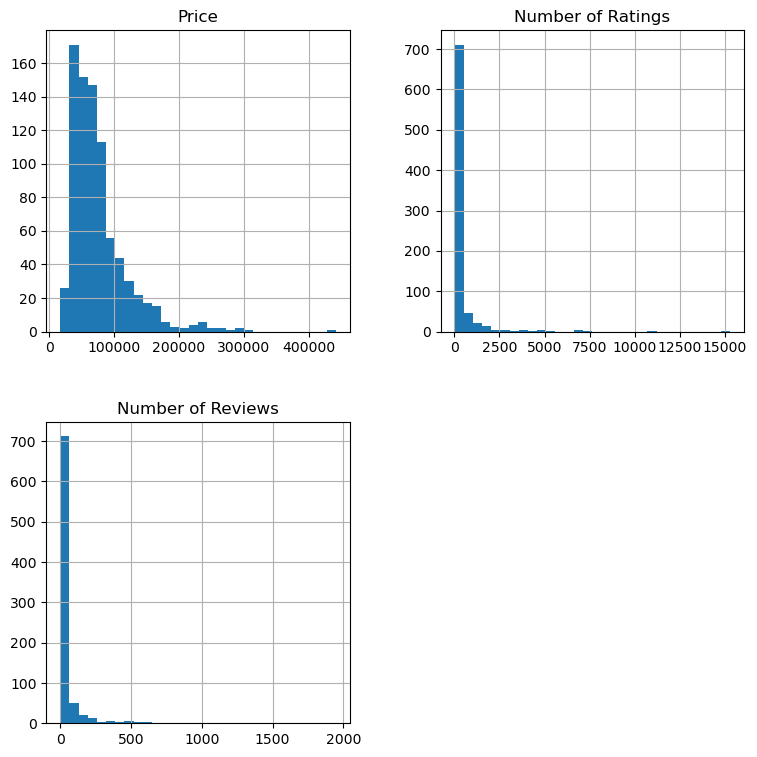

In [9]:
df.hist(figsize = (9,9), bins = 30);

Цена на ноутбуки наиболее плотно распределяется в диапазон от 0 до 100.000. Также присутствует небольшое кольчество более дорогих моделей.

Большая часть ноутбуков имеет небольшое количество оценок и отзывов, но все таки есть и популярные модели ноутбуков.

In [10]:
# Самый дорогой ноутбук
df[df['Price'] == df['Price'].max()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
594,ASUS,Intel,Core i9,11th,16 GB,DDR4,3072 GB,0 GB,Windows,32-bit,6 GB,Casual,1 year,No,No,441990,5 stars,1,1


Данный ноутбук в такой ценевой категории один, но он не является выбросом, ведь в нашем датасете могут присутствовать и дорогие модели.

In [11]:
df[df['Price'] == df['Price'].min()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
194,Lenovo,Intel,Celeron Dual,Not Available,4 GB,LPDDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,16990,3 stars,414,54


In [12]:
df[df['Number of Reviews'] == df['Number of Reviews'].max()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
21,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,23990,3 stars,15279,1947


Также выявили:
- самую дешевую модель ноутбука
- самый популярный по отзывам и рейтингу ноутбук среди покупателей

In [13]:
# Поиск дубликатов
df.duplicated().sum()

21

In [14]:
df[df.duplicated()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
182,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,43590,3 stars,0,0
265,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,59990,3 stars,0,0
352,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,84990,3 stars,0,0
375,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
399,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,73063,3 stars,17,3


In [15]:
df[df.duplicated(keep='last')]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
37,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
119,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
178,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,43590,3 stars,0,0
263,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,59990,3 stars,0,0
349,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,84990,3 stars,0,0
351,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
388,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
398,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,73063,3 stars,17,3


In [16]:
# Удалим дубликаты
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape

(802, 19)

Выявили наличие дубликатов (21) с начала и с конца датасета, удалили их. 

Строк осталось 802 из изначальных 823.

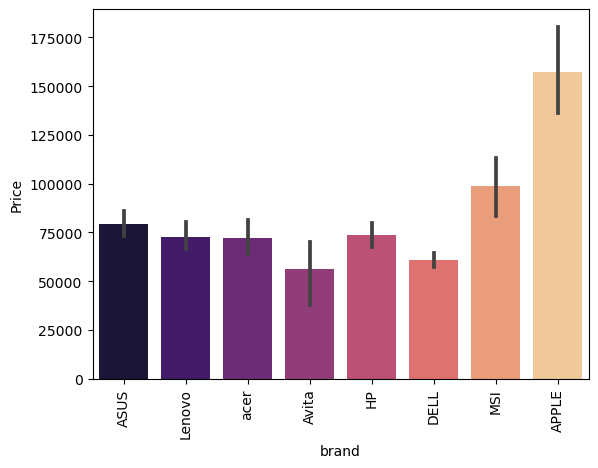

In [17]:
# Визуализируем цены ноутбуков от брендов
sns.barplot(data = df, x = 'brand', y = 'Price', palette = 'magma')
plt.xticks(rotation = 'vertical')
plt.show()

На графике отображены средние цены ноутбуков разных брендов. Заметим, что цены существенно различаются в зависимости от бренда. 

Черная полоса отображает разброс цен для каждой марки - чем длиннее полоса, тем большее различие в ценах ноутбуков одного бренда.

Наиболее дорогие ноутбуки — Apple, за ними следуют MSI. Самые недорогие — Avita и DELL.

В целом, график демонстрирует сильную зависимость цены ноутбука от бренда.

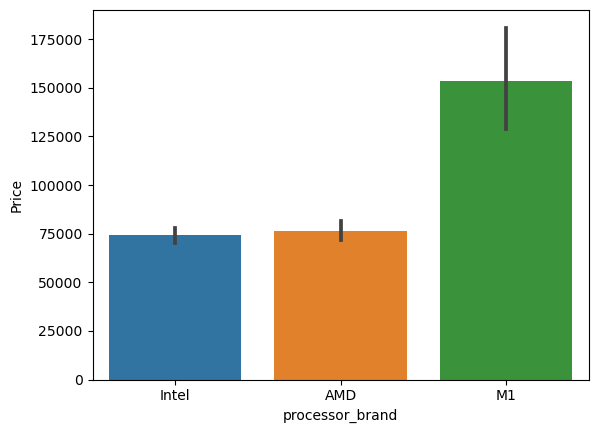

In [18]:
# Визуализируем цены на определенные
sns.barplot(data = df, x = 'processor_brand', y = 'Price')
plt.show()

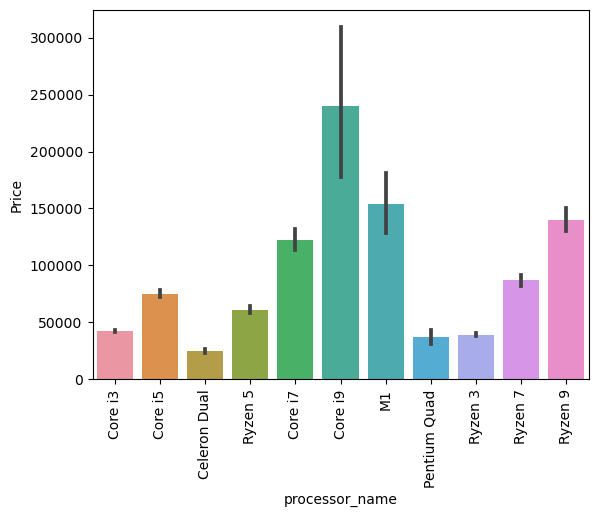

In [19]:
sns.barplot(data = df, x = 'processor_name', y = 'Price')
plt.xticks(rotation ='vertical')
plt.show()

Также заметим, что модель процессора Core i9 стоит в более дорогих ноутбуках и она также существенно влияет на его цену.

# 2.2 Предварительная обработка данных

In [20]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [21]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

### Преобразуем типы данных object в int у всех признаков для дальнейшего обучения модели.

In [22]:
df['ram_gb'] = df.ram_gb.str.replace(' GB', '')
df['ram_gb'] = df.ram_gb.astype(int)

df['ssd'] = df.ssd.str.replace(' GB', '')
df['ssd'] = df.ssd.astype(int)

df['hdd'] = df.hdd.str.replace(' GB', '')
df['hdd'] = df.hdd.astype(int)

df['graphic_card_gb'] = df.graphic_card_gb.str.replace(' GB', '')
df['graphic_card_gb'] = df.graphic_card_gb.astype(int)

In [23]:
df['warranty'].value_counts()

warranty
1 year         498
No warranty    268
2 years         23
3 years         13
Name: count, dtype: int64

У большинства ноутбуков лишь годовая гарантия.

In [24]:
# Преобразуем тип данных object в int у признаков warrianty, Touchscreen, msoffice
def swap_warranty(z):
    if z == '1 year':
        return 1
    elif z == '2 years':
        return 2
    elif z == '3 years':
        return 3
    else:
        return 0

In [25]:
df['warranty'] = df['warranty'].apply(swap_warranty)
df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 1 if x == 'Yes' else 0)
df['msoffice'] = df['msoffice'].apply(lambda x: 1 if x == 'Yes' else 0)

In [26]:
df.os.value_counts()

os
Windows    763
Mac         23
DOS         16
Name: count, dtype: int64

Практически все ноутбуки с операционной системой Windows, лишь малое количество с macOS и еще меньше с DOS.

In [27]:
def swap_os(z):
    if z == 'Windows':
        return 1
    elif z == 'Mac':
        return 2
    else:
        return 3

In [28]:
def swap_weight(z):
    if z == 'Casual':
        return 1
    elif z == 'ThinNlight':
        return 2
    else:
        return 3

In [29]:
df['os'] = df['os'].apply(swap_os)

In [30]:
df.weight.value_counts()

weight
Casual        509
ThinNlight    254
Gaming         39
Name: count, dtype: int64

509 ноутбуков относятся к категории "Casual" (средний вес, не слишком лёгкие и не слишком тяжёлые).

254 ноутбука — лёгкие ноутбуки ("Thin and Light").

39 ноутбуков — игровые ноутбуки ("Gaming"), которые, как правило, тяжелее из-за мощных компонентов.

In [31]:
df['weight'] = df['weight'].apply(swap_weight)

In [32]:
df.ram_type.value_counts()

ram_type
DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: count, dtype: int64

In [33]:
def swap_ramtype(z):
    if z == 'DDR4':
        return 1
    elif z == 'LPDDR4X':
        return 2
    elif z == 'LPDDR4':
        return 3
    elif z == 'LPDDR3':
        return 4
    elif z == 'DDR5':
        return 5
    else:
        return 6

In [34]:
df['ram_type'] = df['ram_type'].apply(swap_ramtype)

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [36]:
df['brand'] = le.fit_transform(df['brand'])
df['processor_brand'] = le.fit_transform(df['processor_brand'])
df['processor_name'] = le.fit_transform(df['processor_name'])
df['processor_gnrtn'] = le.fit_transform(df['processor_gnrtn'])
df['os_bit'] = le.fit_transform(df['os_bit'])
df['rating'] = le.fit_transform(df['rating'])

Просмотрим данные и убедимся в их успешном преобразовании из типа object в тип int64.

In [37]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,0,4,1,0,1024,1,1,0,1,0,0,0,34649,1,3,0
1,5,1,1,0,4,1,0,1024,1,1,0,1,0,0,0,38999,2,65,5
2,5,1,1,0,4,1,0,1024,1,1,0,1,0,0,0,39999,2,8,1
3,1,1,2,0,8,1,512,0,1,0,2,1,0,0,0,69990,2,0,0
4,1,1,0,7,4,1,0,512,1,1,0,1,0,0,0,26990,2,0,0


<Axes: >

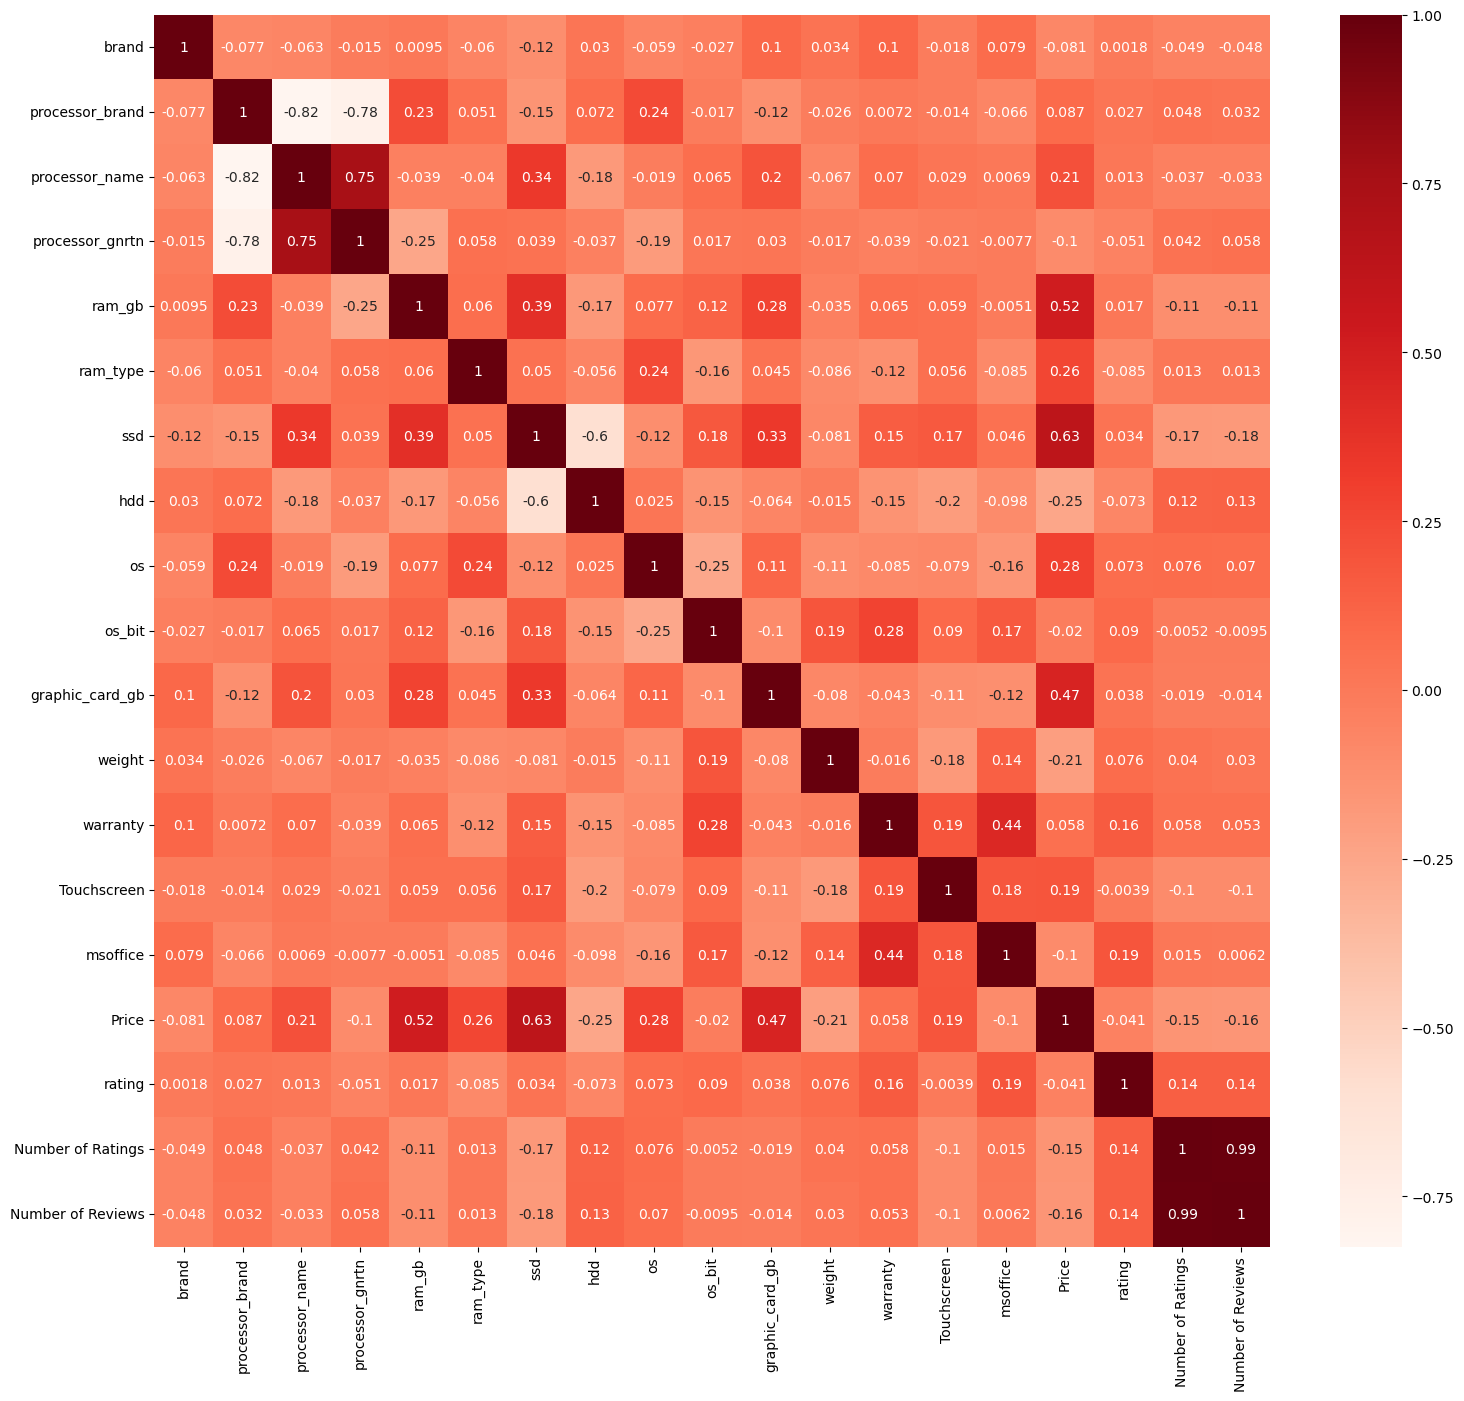

In [38]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

Заметим, что с нашей целевой переменной Price более менее коррелируют признаки ssd, ram_gb, graphic_card_gb, processor_name, ram_type, os

Слабо коррелируют msoffice, weight, os_bit. 

In [39]:
X = df.drop(['Price'], axis=1)
y = df['Price']

Приступаем к обучению.

## Обучение моделей 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
dct = {}

## RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

<Axes: xlabel='Price'>

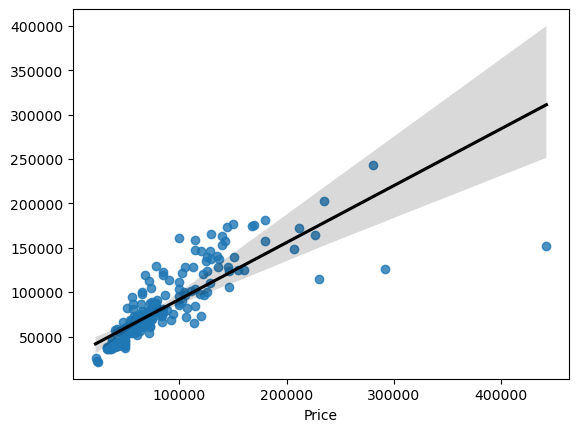

In [43]:
sns.regplot(x=y_test,y=rf_pred,line_kws={"color":"black"})

Точки разбросаны вокруг линии регрессии, указывая на то, что модель не идеально предсказывает цены во всех случаях.

In [44]:
display(rf_pred[:20])
display(np.array(y_test[:20]))

array([ 82642.72      ,  87490.59      ,  42454.89      , 173879.83      ,
       165428.276     , 157167.5       ,  97075.        ,  97422.15      ,
        58303.79      , 140003.95      ,  39736.17      ,  38112.2       ,
        70237.53666667, 128690.34809524,  72882.58      , 126520.85      ,
        71723.72      ,  41183.24      ,  61336.765     , 125416.09116667])

array([ 50990,  72990,  41490, 144690, 129990, 142990, 104990,  64990,
        51990, 125394,  41990,  32917,  65990, 144990,  57999, 291190,
       106490,  45490,  61290, 154990], dtype=int64)

In [45]:
r2_random = r2_score(y_test, rf_pred)
print('R2 Score', r2_random)
dct['RandomForest'] = r2_random

R2 Score 0.6804096881187361


 У модели RandomForestRegression - умеренная предсказательная способность

## Decision Tree Regressor

In [46]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
tree_pred = decision_tree_regressor.predict(X_test)

<Axes: xlabel='Price'>

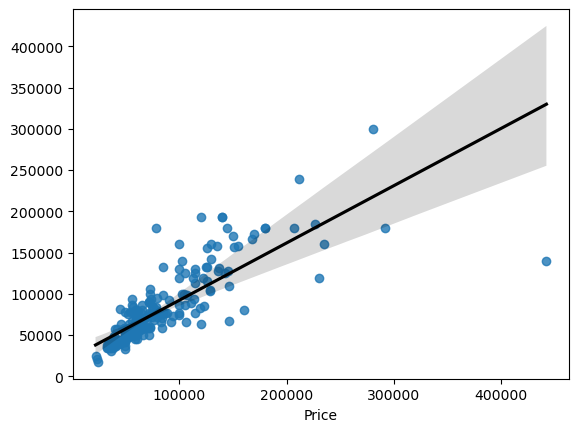

In [47]:
sns.regplot(x=y_test,y=tree_pred,line_kws={"color":"black"})

In [48]:
display(tree_pred[:20])
display(np.array(y_test[:20]))

array([ 46990.        , 105990.        ,  41390.        , 179990.        ,
       159990.        , 124990.        ,  85990.        ,  79990.        ,
        53990.        , 155411.        ,  41500.        ,  37990.        ,
        59990.        , 127493.33333333,  49990.        , 179990.        ,
        65990.        ,  39990.        ,  79500.        , 157499.5       ])

array([ 50990,  72990,  41490, 144690, 129990, 142990, 104990,  64990,
        51990, 125394,  41990,  32917,  65990, 144990,  57999, 291190,
       106490,  45490,  61290, 154990], dtype=int64)

In [49]:
print('R2 Score', r2_score(y_test, tree_pred))
dct['DecisionTree'] = r2_score(y_test, tree_pred)

R2 Score 0.6488009950834377


## GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(n_estimators = 250)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)

<Axes: xlabel='Price'>

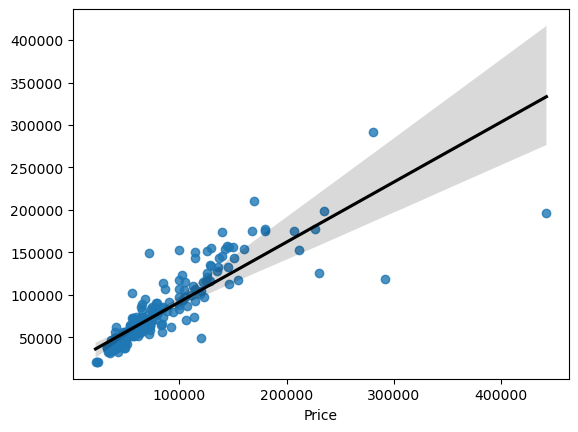

In [51]:
sns.regplot(x=y_test,y=boost_pred,line_kws={"color":"black"})

In [52]:
display(boost_pred[:20])
display(np.array(y_test[:20]))

array([ 41815.20986433,  70701.83894416,  62015.84967154, 157834.14841831,
       133740.30981081, 154548.6867146 ,  97820.84478859,  89011.61239485,
        56571.06543769, 152162.15966255,  37991.27918606,  38801.33334025,
        74241.32364615, 132511.40330741,  63820.97414211, 119100.9682701 ,
        69990.83325354,  47500.14058193,  64886.08479851, 117578.16024499])

array([ 50990,  72990,  41490, 144690, 129990, 142990, 104990,  64990,
        51990, 125394,  41990,  32917,  65990, 144990,  57999, 291190,
       106490,  45490,  61290, 154990], dtype=int64)

In [53]:
print('R2 Score', r2_score(y_test, boost_pred))
dct['GradientBoosting'] = r2_score(y_test, boost_pred)

R2 Score 0.7420258983750749


# LightGBM

In [54]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()

In [55]:
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 561, number of used features: 18
[LightGBM] [Info] Start training from score 75931.434938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

<Axes: xlabel='Price'>

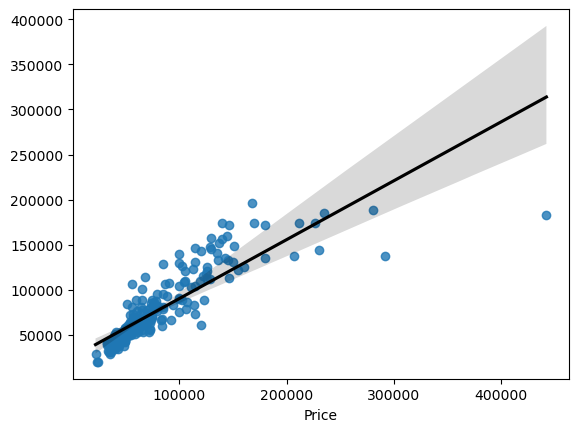

In [56]:
sns.regplot(x=y_test,y=lgbm_pred,line_kws={"color":"black"})

In [57]:
display(lgbm_pred[:20])
display(np.array(y_test[:20]))

array([ 84119.1975309 ,  79979.00633676,  52637.46200224, 160021.94694612,
       144768.56076467, 135044.0763051 , 109416.89629737, 101154.51118182,
        56939.73357389, 125459.78661149,  37451.21618254,  40282.13690294,
        61186.46939814, 132540.57221193,  69310.15165812, 137044.44875161,
        78756.44615063,  41354.11411146,  62242.87288717, 121776.59476095])

array([ 50990,  72990,  41490, 144690, 129990, 142990, 104990,  64990,
        51990, 125394,  41990,  32917,  65990, 144990,  57999, 291190,
       106490,  45490,  61290, 154990], dtype=int64)

In [58]:
print('R2 Score', r2_score(y_test, lgbm_pred))
dct['LightGBM'] = r2_score(y_test, lgbm_pred)

R2 Score 0.7225274234172246


# Сравнение моделей

Выведем визуальную диаграмму, чтобы отметить какая модель лучше всех обучилась и предсказала данные.

[Text(0.5, 0, 'Models'),
 Text(0, 0.5, 'r2_score'),
 Text(0.5, 1.0, 'r2-score of ML Models')]

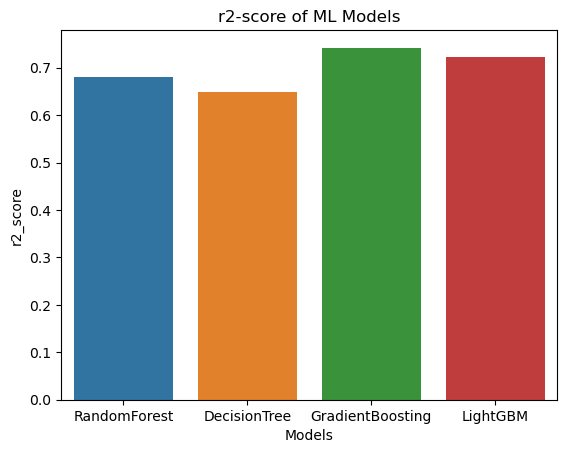

In [59]:
df3 = pd.DataFrame(dct.items())
ax = sns.barplot(x=0, y=1, data=df3)
ax.set(xlabel = 'Models', ylabel='r2_score', title='r2-score of ML Models')

In [60]:
log_cols = ["Classifier", "r2_score"]
log = pd.DataFrame(columns=log_cols)
log['Classifier'] = dct.keys()
log['r2_score'] = dct.values()
log

,Classifier,r2_score
0,RandomForest,0.680410
1,DecisionTree,0.648801
2,GradientBoosting,0.742026
3,LightGBM,0.722527


Настроим гиперпараметры

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import optuna

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000), 
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 0.1),  
        'max_depth': trial.suggest_int('max_depth', 3, 15), 
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.5, 1.0),
        'random_state': trial.suggest_int('random_state', 0, 100)
    }

    model = GradientBoostingRegressor(**param)

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    return r2_score(y_test, predictions)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters: ", study.best_params)

best_params = study.best_params
best_model = GradientBoostingRegressor(**best_params)

best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R^2 score with best hyperparameters: {r2}")

[I 2024-11-29 09:25:29,284] A new study created in memory with name: no-name-69b33c08-f0ec-47c7-a019-e1ae1448b53d
[I 2024-11-29 09:25:30,291] Trial 0 finished with value: 0.7166692819365573 and parameters: {'n_estimators': 927, 'learning_rate': 0.02567564943279317, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 1, 'subsample': 0.5496348492905836, 'max_features': 0.7675909228422639, 'random_state': 37}. Best is trial 0 with value: 0.7166692819365573.
[I 2024-11-29 09:25:31,365] Trial 1 finished with value: 0.7133564043361547 and parameters: {'n_estimators': 1040, 'learning_rate': 0.0054166613366566155, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 13, 'subsample': 0.6528962533888104, 'max_features': 0.9002211878085113, 'random_state': 34}. Best is trial 0 with value: 0.7166692819365573.
[I 2024-11-29 09:25:32,717] Trial 2 finished with value: 0.2589890435757153 and parameters: {'n_estimators': 1627, 'learning_rate': 0.00021741211066280831, 'max_depth': 7, '

[I 2024-11-29 09:25:52,147] Trial 23 finished with value: 0.7333756118980957 and parameters: {'n_estimators': 1054, 'learning_rate': 0.012864382378666463, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 10, 'subsample': 0.5005399914695656, 'max_features': 0.8897589158869215, 'random_state': 9}. Best is trial 21 with value: 0.7706549282619357.
[I 2024-11-29 09:25:53,865] Trial 24 finished with value: 0.7660349375797209 and parameters: {'n_estimators': 1344, 'learning_rate': 0.04440673211960104, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 3, 'subsample': 0.5548522757656371, 'max_features': 0.8002600235245377, 'random_state': 22}. Best is trial 21 with value: 0.7706549282619357.
[I 2024-11-29 09:25:55,143] Trial 25 finished with value: 0.7705519655724553 and parameters: {'n_estimators': 1633, 'learning_rate': 0.02442247376166315, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 13, 'subsample': 0.6359194927869654, 'max_features': 0.862611121429968

[I 2024-11-29 09:26:32,385] Trial 46 finished with value: 0.7735653202760819 and parameters: {'n_estimators': 1887, 'learning_rate': 0.033650610475722174, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 9, 'subsample': 0.6560620741704177, 'max_features': 0.8258103288618599, 'random_state': 54}. Best is trial 41 with value: 0.7785028324498806.
[I 2024-11-29 09:26:34,364] Trial 47 finished with value: 0.7767121123616733 and parameters: {'n_estimators': 1875, 'learning_rate': 0.035603257447540115, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 7, 'subsample': 0.5726786989701107, 'max_features': 0.8348093259165168, 'random_state': 52}. Best is trial 41 with value: 0.7785028324498806.
[I 2024-11-29 09:26:36,271] Trial 48 finished with value: 0.7582565912737055 and parameters: {'n_estimators': 1556, 'learning_rate': 0.06456523588799053, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4, 'subsample': 0.5684323761890474, 'max_features': 0.914272425588017

[I 2024-11-29 09:27:12,361] Trial 69 finished with value: 0.7588662112513003 and parameters: {'n_estimators': 1820, 'learning_rate': 0.006458870228796811, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.5988101342367809, 'max_features': 0.6864948523803367, 'random_state': 48}. Best is trial 56 with value: 0.7820045681924627.
[I 2024-11-29 09:27:13,903] Trial 70 finished with value: 0.775214160130751 and parameters: {'n_estimators': 1598, 'learning_rate': 0.01733868853485696, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 9, 'subsample': 0.6919874617271418, 'max_features': 0.7704424213706567, 'random_state': 62}. Best is trial 56 with value: 0.7820045681924627.
[I 2024-11-29 09:27:16,085] Trial 71 finished with value: 0.7682603203559735 and parameters: {'n_estimators': 1919, 'learning_rate': 0.036760400034537566, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 6, 'subsample': 0.6217057634019143, 'max_features': 0.8528624711361698, 

[I 2024-11-29 09:27:45,136] Trial 92 finished with value: 0.7769217755401566 and parameters: {'n_estimators': 1672, 'learning_rate': 0.016004796287199495, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 2, 'subsample': 0.5817418094567541, 'max_features': 0.5013691008152235, 'random_state': 27}. Best is trial 86 with value: 0.7911305089997703.
[I 2024-11-29 09:27:46,254] Trial 93 finished with value: 0.7663442197493993 and parameters: {'n_estimators': 1701, 'learning_rate': 0.007819428871324514, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 0.5617670900962105, 'max_features': 0.5188219743418648, 'random_state': 16}. Best is trial 86 with value: 0.7911305089997703.
[I 2024-11-29 09:27:47,162] Trial 94 finished with value: 0.7467096647996109 and parameters: {'n_estimators': 1490, 'learning_rate': 0.01641840529791511, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 1, 'subsample': 0.6051561905975413, 'max_features': 0.545853909365498

Best hyperparameters:  {'n_estimators': 1694, 'learning_rate': 0.015473441555031565, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.6020798595317004, 'max_features': 0.526496973766015, 'random_state': 29}
R^2 score with best hyperparameters: 0.7911305089997703


Применим эти гиперпараметры для обучения новой модели

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(n_estimators = 1694, 
                                  learning_rate = 0.015473441555031565, 
                                  max_depth = 6, 
                                  min_samples_split = 10,
                                 min_samples_leaf = 2,
                                 subsample = 0.6020798595317004,
                                 max_features = 0.526496973766015,
                                 random_state = 29)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)
print(r2_score(y_test, boost_pred))

0.7911305089997703


<Axes: xlabel='Price'>

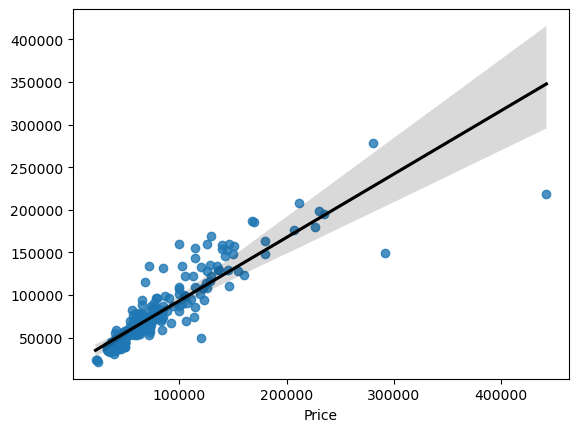

In [64]:
sns.regplot(x=y_test,y=boost_pred,line_kws={"color":"black"})

Наблюдаем видимое улучшение значение R2-score

### Модель GradientBoostingRegressor обучилась намного лучше, модель LightGBM обучилась чуть хуже, но тоже неплохо. А DecisionTreeRegressor и RandomForestRegressor показали себя хуже. После настройки гиперпараметров смогли получить значение R2score по-лучше, чем было изначально


## Вывод

В ходе внимательного анализа датасета были обнаружены и удалены дублирующиеся строки. Пустых значений и выбросов в данных не было найдено. Мы обучили четыре модели: GradientBoostingRegressor, DecisionTreeRegressor, RandomForestRegressor, LightGBMRegressor.

Лучшие результаты показала модель GradientBoostingRegressor, которая продемонстрировала более высокую точность и стабильность при тестировании, в отличии от других моделей.

Т.К. модель GradientBoostingRegression оказалась точнее всех, подобрали для нее гиперпараметры, и произвели улучшение значения R2-score.